In [ ]:
!pip install ipython-autotime
%load_ext autotime
import pandas as pd # Importing the pandas library for data manipulation and analysis
import numpy as np # Importing the numpy library for numerical computations
import matplotlib.pyplot as plt # Importing the matplotlib library for data visualization
import seaborn as sns # Importing the seaborn library for statistical data visualization

In [ ]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1tL8frVJ3USsauaZJlewkNsBJwV0OyrOG&export=download'
df = pd.read_csv(url) # Reading the data from the provided URL

time: 1.45 s (started: 2023-06-05 02:35:09 +00:00)


In [ ]:
print(df) # read the data

     age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0     75    0     190      80           91         193          371   
1     56    1     165      64           81         174          401   
2     54    0     172      95          138         163          386   
3     55    0     175      94          100         202          380   
4     75    0     190      80           88         181          360   
..   ...  ...     ...     ...          ...         ...          ...   
447   53    1     160      70           80         199          382   
448   37    0     190      85          100         137          361   
449   36    0     166      68          108         176          365   
450   32    1     155      55           93         106          386   
451   78    1     160      70           79         127          364   

     Tinterval  Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  \
0          174        121  -16  ...            0.0            9.0   
1        

In [ ]:
df.info() # Displaying information about the DataFrame (e.g., column names, data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to classes
dtypes: float64(121), int64(159)
memory usage: 988.9 KB
time: 82.2 ms (started: 2023-06-05 02:35:10 +00:00)


In [ ]:
df.describe() # Generating descriptive statistics of the DataFrame

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,classes
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


time: 1.17 s (started: 2023-06-05 02:35:10 +00:00)


In [ ]:
df.shape #Checking data shape (row,columns)

(452, 280)

time: 2.78 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Data preprocessing
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

time: 1.95 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)  # Calculating the number of missing values in each column
print("Missing values:")
missing_values.head(10) # Printing the columns with the highest number of missing values

Missing values:


J                  376
P                   22
T                    8
QRST                 1
heartrate            1
chAVR_SwaveAmp       0
chAVR_RwaveAmp       0
chAVR_QwaveAmp       0
chAVR_JJwaveAmp      0
chDIII_QRSTA         0
dtype: int64

time: 11.6 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(df) # Setting the threshold for dropping columns with missing values
df.dropna(thresh=threshold, axis=1, inplace=True)  # Dropping columns with more than 50% missing values

time: 5.76 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True) # Filling the remaining missing values with the mean of each column

time: 178 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False) # Checking if there are any remaining missing values
print("Missing values:")
missing_values.head(10) # Printing the columns with the highest number of missing values

Missing values:


age                 0
chDIII_PwaveAmp     0
chAVR_RwaveAmp      0
chAVR_QwaveAmp      0
chAVR_JJwaveAmp     0
chDIII_QRSTA        0
chDIII_QRSA         0
chDIII_TwaveAmp     0
chDIII_SPwaveAmp    0
chDII_TwaveAmp      0
dtype: int64

time: 13 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
df.shape  # Displaying the shape of the DataFrame (number of rows, number of columns)

(452, 279)

time: 4.36 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Shuffle Data
df = df.sample(452).reset_index(drop=True)  # Shuffling the rows of the DataFrame randomly
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,classes
0,66,1,160,124,99,154,329,172,95,-48,...,0.0,4.3,-5.2,0.0,0,0.6,1.7,-7.2,4.7,1
1,49,0,166,73,95,157,383,163,92,-18,...,0.0,5.6,-0.5,0.0,0,0.4,1.7,11.1,25.3,1
2,44,1,160,65,79,170,350,258,91,58,...,0.0,9.9,0.0,0.0,0,0.7,-1.7,31.6,6.8,2
3,37,0,182,90,101,294,356,164,143,33,...,0.0,6.9,0.0,0.0,0,0.2,1.9,22.0,38.3,16
4,38,1,160,63,79,0,376,165,0,34,...,0.0,10.1,0.0,0.0,0,0.0,1.5,26.2,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,41,1,154,75,88,157,384,132,112,65,...,-0.4,10.5,-2.5,0.0,0,0.5,1.4,17.8,29.5,10
448,44,0,169,80,109,128,382,195,60,-34,...,0.0,6.9,0.0,0.0,0,0.4,1.3,20.7,29.2,16
449,69,1,160,71,75,156,322,172,105,18,...,0.0,6.6,-0.8,0.0,0,0.2,1.3,11.8,23.5,5
450,40,1,153,55,82,140,388,149,82,52,...,0.0,13.6,0.0,0.0,0,0.5,2.5,35.3,57.3,1


time: 37.6 ms (started: 2023-06-05 02:35:12 +00:00)


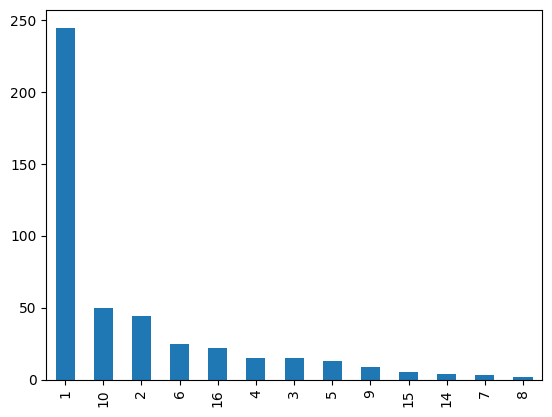

time: 502 ms (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
#check classes distribution
Classcounts = df['classes'].value_counts()
Classcounts.plot(kind='bar')
plt.show()

In [ ]:
selected_columns = ['age', 'sex', 'weight', 'height'] # Selecting specific columns for analysis

time: 683 µs (started: 2023-06-05 02:35:12 +00:00)


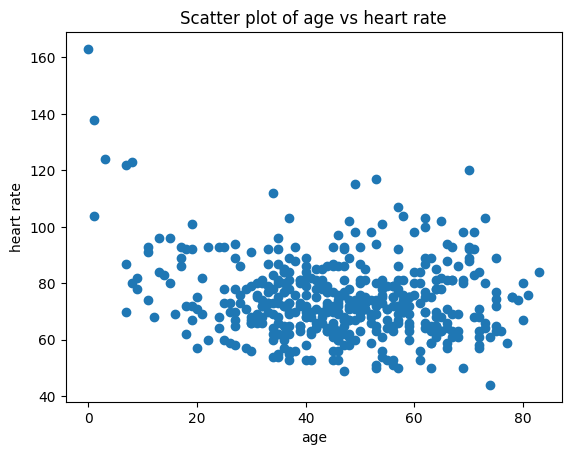

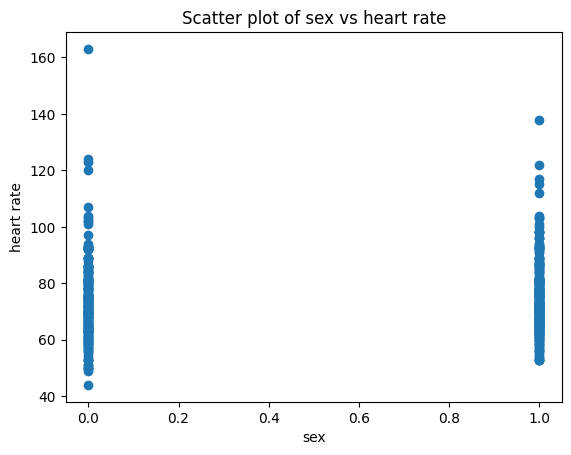

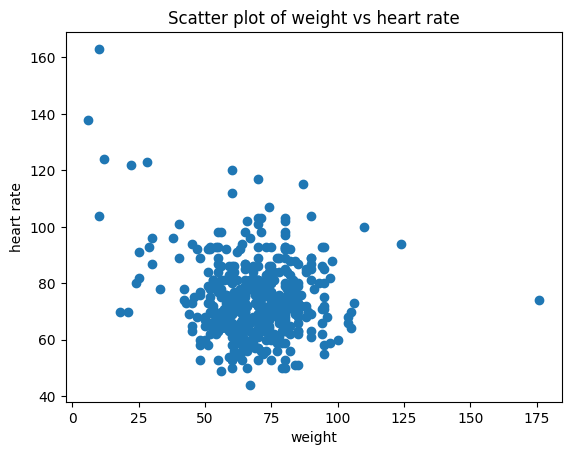

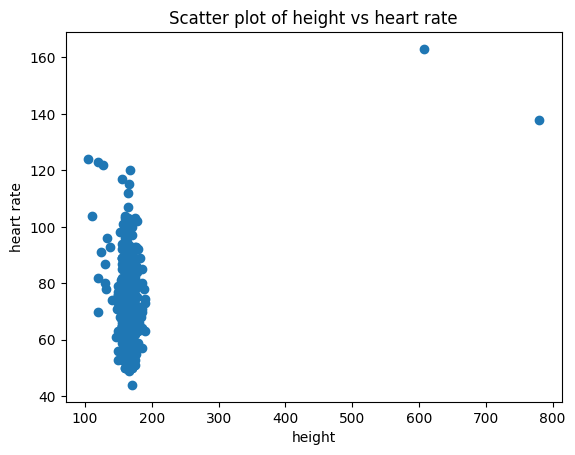

time: 1.36 s (started: 2023-06-05 02:35:12 +00:00)


In [ ]:
# Create a scatter plot
for i in range(len(selected_columns)):
  x_column = selected_columns[i] # Selecting the x-axis column for the scatter plot

  # Create scatter plot
  plt.scatter(df[x_column], df['heartrate']) # Generating a scatter plot of x_column vs heartrate
  plt.xlabel(x_column)  # Setting the x-axis label
  plt.ylabel('heart rate') # Setting the y-axis label
  plt.title('Scatter plot of {} vs {}'.format(x_column, 'heart rate')) # Setting the plot title
  plt.show() # Displaying the scatter plot

In [ ]:
df = df[df['height'] <= 200] # to drop all data that have height more than 200

time: 4.17 ms (started: 2023-06-05 02:35:14 +00:00)


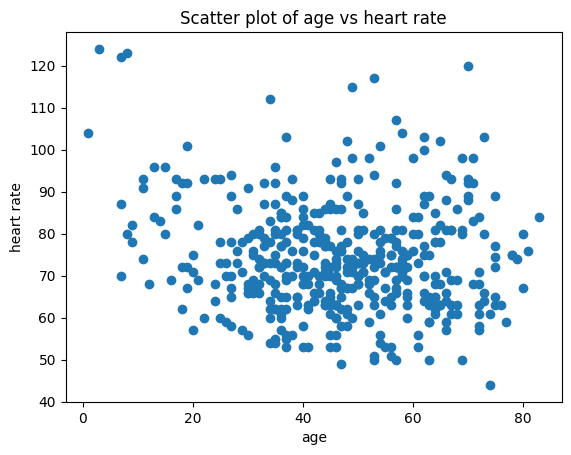

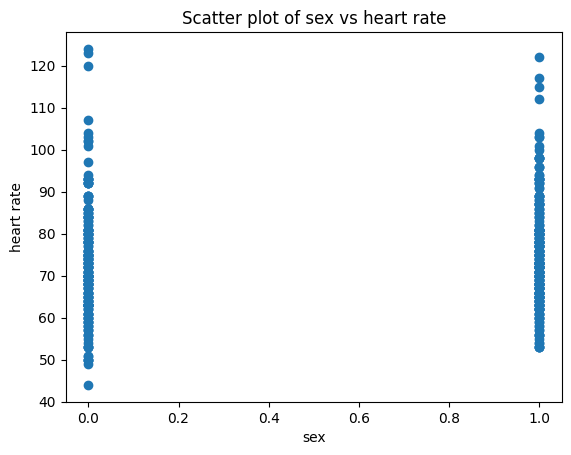

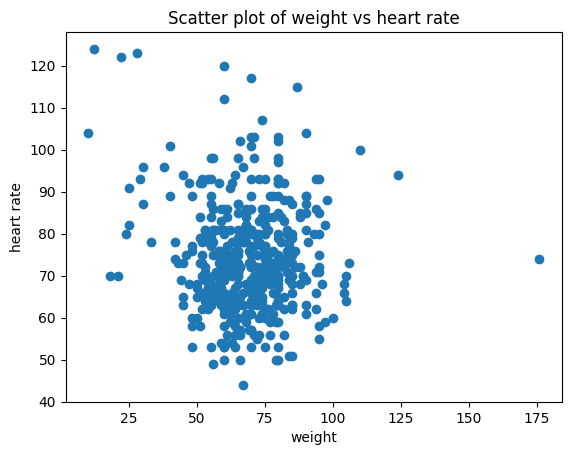

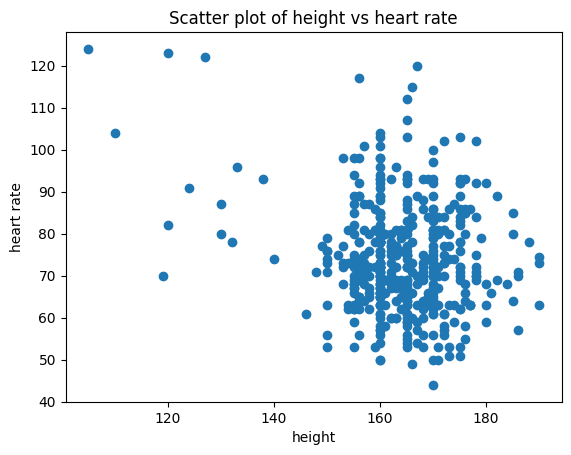

time: 1.07 s (started: 2023-06-05 02:35:14 +00:00)


In [ ]:
# Create a scatter plot
for i in range(len(selected_columns)):
  x_column = selected_columns[i]

  # Create scatter plot
  plt.scatter(df[x_column], df['heartrate'])
  plt.xlabel(x_column)
  plt.ylabel('heart rate')
  plt.title('Scatter plot of {} vs {}'.format(x_column, 'heart rate'))
  plt.show()

In [ ]:
# Drop columns with a minimum and maximum value of zero
min_max_zero_cols = df.columns[(df.describe().loc['min'] == 0) & (df.describe().loc['max'] == 0)]  # Finding columns with minimum and maximum values equal to zero
df.drop(min_max_zero_cols, axis=1, inplace=True)  # Dropping columns with zero values

time: 1.53 s (started: 2023-06-05 02:35:15 +00:00)


<ipython-input-19-9dec7f98ff09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(min_max_zero_cols, axis=1, inplace=True)  # Dropping columns with zero values


In [ ]:
# Calculate the correlation between all columns and the target column
correlations = df.corr()['classes']

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)

time: 108 ms (started: 2023-06-05 02:35:16 +00:00)


In [ ]:
correlations.head(20)  # Displaying the top 20 correlations

classes                        1.000000
chV1_RPwave                    0.369370
QRSduration                    0.324365
chV1_intrinsicReflecttions     0.313934
chV2_RPwave                    0.282876
chV1_RPwaveAmp                 0.235787
chV2_RPwaveAmp                 0.219071
chDI_Swave                     0.194688
chDII_Swave                    0.183200
chV1_DD_RRwaveExists           0.174519
chAVR_Rwave                    0.172557
chV4_Swave                     0.170794
chAVR_RwaveAmp                 0.165244
chAVL_intrinsicReflecttions    0.153928
chV3_JJwaveAmp                 0.152990
chAVF_Swave                    0.144001
chV6_intrinsicReflecttions     0.142085
chV1_RwaveAmp                  0.141355
chV3_Swave                     0.140728
chAVR_intrinsicReflecttions    0.140614
Name: classes, dtype: float64

time: 6.49 ms (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
correlations.tail(20) # Displaying the bottom 20 correlations

chV2_QRSTA       -0.094146
chAVF_SwaveAmp   -0.099030
PRinterval       -0.099777
chDI_QRSA        -0.100915
chDI_PwaveAmp    -0.107980
chV2_QRSA        -0.110374
chV1_Swave       -0.117239
Pinterval        -0.121948
chAVL_QRSTA      -0.133629
chDI_RwaveAmp    -0.136668
chAVL_SwaveAmp   -0.145780
chV4_SwaveAmp    -0.149819
chDII_SwaveAmp   -0.158759
chV3_QRSA        -0.160412
chV5_QwaveAmp    -0.161956
chV6_QwaveAmp    -0.164352
chDI_QRSTA       -0.171079
sex              -0.178393
chV3_SwaveAmp    -0.189353
chDI_SwaveAmp    -0.208428
Name: classes, dtype: float64

time: 4.8 ms (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
df.shape # Displaying the shape of the DataFrame (number of rows, number of columns)

(450, 261)

time: 4.62 ms (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
# Perform folding on the data
fold1 = (df.iloc[0:150].reset_index(drop=True), df.iloc[150:450].reset_index(drop=True))  # Creating fold1
fold2 = (df.iloc[150:300].reset_index(drop=True), pd.concat([df.iloc[0:150], df.iloc[300:450]]).reset_index(drop=True))  # Creating fold2
fold3 = (df.iloc[300:450].reset_index(drop=True), df.iloc[0:300].reset_index(drop=True))  # Creating fold3

test, train = fold2 # Splitting the data into test and train sets
print(train) # Displaying the train data from fold2 (150 rows)

     age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0     66    1     160     124           99         154          329   
1     49    0     166      73           95         157          383   
2     44    1     160      65           79         170          350   
3     37    0     182      90          101         294          356   
4     38    1     160      63           79           0          376   
..   ...  ...     ...     ...          ...         ...          ...   
295   41    1     154      75           88         157          384   
296   44    0     169      80          109         128          382   
297   69    1     160      71           75         156          322   
298   40    1     153      55           82         140          388   
299   44    1     160      64           74         129          330   

     Tinterval  Pinterval  QRS  ...  chV6_JJwaveAmp  chV6_QwaveAmp  \
0          172         95  -48  ...             0.0            0.0   
1      

In [ ]:
# Normalizations
def norm(df):
  df = (df - df.min()) / (df.max() - df.min())  #  Min-max normalization formula/code
  return df

time: 533 µs (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
# Assign fitur and class
X = df.drop('classes', axis=1) # Removing the 'classes' column from the feature data
y = df.classes # Assigning the 'classes' column as the target variable

time: 3.09 ms (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
X = norm(X) # Performing normalization on the feature data
X

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,0.792683,1.0,0.647059,0.686747,0.330827,0.293893,0.330855,0.234432,0.463415,0.363636,...,0.364491,0.674699,1.000000,0.182203,0.818182,0.0,0.43750,0.641667,0.278195,0.280259
1,0.585366,0.0,0.717647,0.379518,0.300752,0.299618,0.531599,0.201465,0.448780,0.451613,...,0.490339,0.662651,1.000000,0.237288,0.982517,0.0,0.37500,0.641667,0.415789,0.413592
2,0.524390,1.0,0.647059,0.331325,0.180451,0.324427,0.408922,0.549451,0.443902,0.674487,...,0.389034,0.566265,1.000000,0.419492,1.000000,0.0,0.46875,0.358333,0.569925,0.293851
3,0.439024,0.0,0.905882,0.481928,0.345865,0.561069,0.431227,0.205128,0.697561,0.601173,...,0.582245,0.662651,1.000000,0.292373,1.000000,0.0,0.31250,0.658333,0.497744,0.497735
4,0.451220,1.0,0.647059,0.319277,0.180451,0.000000,0.505576,0.208791,0.000000,0.604106,...,0.531593,0.626506,1.000000,0.427966,1.000000,0.0,0.25000,0.625000,0.529323,0.489320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.487805,1.0,0.576471,0.391566,0.248120,0.299618,0.535316,0.087912,0.546341,0.695015,...,0.634987,0.626506,0.902439,0.444915,0.912587,0.0,0.40625,0.616667,0.466165,0.440777
448,0.524390,0.0,0.752941,0.421687,0.406015,0.244275,0.527881,0.318681,0.292683,0.404692,...,0.448042,0.590361,1.000000,0.292373,1.000000,0.0,0.37500,0.608333,0.487970,0.438835
449,0.829268,1.0,0.647059,0.367470,0.150376,0.297710,0.304833,0.234432,0.512195,0.557185,...,0.434987,0.638554,1.000000,0.279661,0.972028,0.0,0.31250,0.608333,0.421053,0.401942
450,0.475610,1.0,0.564706,0.271084,0.203008,0.267176,0.550186,0.150183,0.400000,0.656891,...,0.633943,0.602410,1.000000,0.576271,1.000000,0.0,0.40625,0.708333,0.597744,0.620712


time: 54.7 ms (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
X.describe() # Generating descriptive statistics of the normalized feature data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.557019,0.551111,0.692261,0.352035,0.255205,0.296175,0.475085,0.227424,0.439198,0.602209,...,0.504249,0.637456,0.932033,0.384200,0.949604,0.005000,0.410347,0.601722,0.478438,0.441348
std,0.197734,0.497934,0.122496,0.097185,0.115751,0.085722,0.119927,0.130567,0.126021,0.132711,...,0.127598,0.071645,0.134044,0.146977,0.069658,0.062786,0.108226,0.118978,0.100983,0.119441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.426829,0.000000,0.647059,0.295181,0.187970,0.270992,0.408922,0.146520,0.385366,0.513930,...,0.413446,0.614458,0.902439,0.279661,0.926573,0.000000,0.375000,0.541667,0.418797,0.364563
50%,0.560976,1.000000,0.694118,0.349398,0.236842,0.299618,0.473978,0.197802,0.443902,0.621701,...,0.491123,0.650602,1.000000,0.372881,0.961538,0.000000,0.406250,0.612500,0.468797,0.431715
75%,0.695122,1.000000,0.764706,0.415663,0.293233,0.333969,0.535316,0.260073,0.497561,0.697947,...,0.583290,0.674699,1.000000,0.474576,1.000000,0.000000,0.468750,0.675000,0.526880,0.516343
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 714 ms (started: 2023-06-05 02:35:17 +00:00)


In [ ]:
# Calculating distance with euclidean distance
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 -x2)**2))# formula to find euclidean distance

time: 723 µs (started: 2023-06-05 02:35:18 +00:00)


In [ ]:
# Calculating the Euclidean distance between the first and second rows of X
euclidean(X.iloc[0], X.iloc[1])

1.8729546666998453

time: 9.26 ms (started: 2023-06-05 02:35:18 +00:00)


In [ ]:
# Training KNN
def knn(X_train, y_train, X_test, k): # k indicates how many neighbors
  dist = []
   # Calculating the distances between training and testing data
  for row in range(X_train.shape[0]):
    dist.append(euclidean(X_train.iloc[row], X_test))

  data = X_train.copy() # Creating a copy of X_train
  data['Dist'] = dist       # Adding the distance values to the data
  data['Class'] = y_train    # Adding the class labels to the data
  data = data.sort_values(by= 'Dist').reset_index(drop=True) # Sorting the data based on distance

  y_pred = data.iloc[:k].Class.mode() # Selecting the most frequent class labels among the k nearest neighbors
  return y_pred[0] # Returning the predicted class label

time: 1.23 ms (started: 2023-06-05 02:35:18 +00:00)


In [ ]:
# Counting accuration
def acc(y_pred, y_true): # Calculating the accuracy of the model
  true = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      true+=1
  return true/len(y_pred) # Returning the accuracy as a ratio of correctly predicted samples

time: 759 µs (started: 2023-06-05 02:35:18 +00:00)


In [ ]:
# Evaluating the model using a specific fold and k value
def evaluate(fold, k):
  test, train = fold # what data we should use here
  X_train, y_train = train.drop('classes', axis=1), train.classes # what column we want to drop
  X_test, y_test = test.drop('classes', axis=1), test.classes # what column we want to drop
  X_train = norm(X_train)# normalize
  X_test =  norm(X_test)# normalize
  y_preds = []
  for row in range(X_test.shape[0]):
    y_preds.append(knn(X_train, y_train, X_test.iloc[row], k)) # the data, the data label, X_test.iloc[row], assign to choose how many point that are close

  return (acc(y_preds, y_test)) # Returning the accuracy of the model

time: 1.24 ms (started: 2023-06-05 02:35:18 +00:00)


using k: 4, with average accuration: 0.6155555555555555
using k: 5, with average accuration: 0.6
using k: 6, with average accuration: 0.6066666666666666
using k: 7, with average accuration: 0.5955555555555555
using k: 8, with average accuration: 0.5955555555555556
using k: 9, with average accuration: 0.5911111111111111
using k: 10, with average accuration: 0.5955555555555555


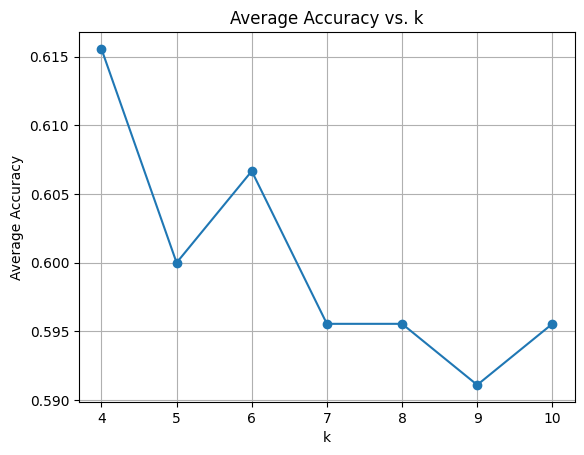

time: 14min 3s (started: 2023-06-05 02:35:18 +00:00)


In [ ]:
k_values = []
avg_accuracies = []

folds = [fold1, fold2, fold3]

for i in range(4, 11):
    k = i
    accs = []
    for j in range(len(folds)):
        accs.append(evaluate(folds[j], k))
    avg_accuracy = sum(accs) / len(folds)

    k_values.append(k)
    avg_accuracies.append(avg_accuracy)
    print(f'using k: {k}, with average accuration: {avg_accuracy}')

# Create line plot
plt.plot(k_values, avg_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. k')
plt.grid(True)
plt.show()